In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

In [2]:
df= pd.read_csv('data/StudentsPerformance.csv')

In [3]:
df.head()

gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test preparation course  math score  reading score  writing score  
0                    none          72             72             74  
1               completed          69             90             88  
2                    none          90             95             93  
3                    none          47             57             44  
4                    none          76             78             75

In [4]:
X= df.drop(columns=['math score'], axis = 1)

In [5]:
X.head()

gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test preparation course  reading score  writing score  
0                    none             72             74  
1               completed             90             88  
2                    none             95             93  
3                    none             57             44  
4                    none             78             75

In [6]:
y=df['math score']

In [7]:
y.head()

0    72
1    69
2    90
3    47
4    76
Name: math score, dtype: int64

In [8]:
## Create Column Transformer with 3 types of transformers

num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
        ("StandardScaler", numeric_transformer, num_features)
    ]
)

In [9]:
X = preprocessor.fit_transform(X)

In [10]:
X

array([[ 1.        ,  0.        ,  0.        , ...,  1.        ,
         0.19399858,  0.39149181],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         1.42747598,  1.31326868],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.77010859,  1.64247471],
       ...,
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.12547206, -0.20107904],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.60515772,  0.58901542],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.15336989,  1.18158627]])

In [11]:
## Train and Test Split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape

((800, 19), (200, 19))

In [12]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_s = r2_score(true, predicted)
    return mae, rmse, r2_s 

In [13]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso" : Lasso(),
    "Ridge" : Ridge(),
    "K-Neighbors Regressor" : KNeighborsRegressor(),
    "Decision Tree" : DecisionTreeRegressor(),
    "Random Forest Regressor" : RandomForestRegressor(),
    "XGBRegressor" : XGBRegressor(),
    "CatBoosting Regressor" : CatBoostRegressor(),
    "Adaboost Regressor" : AdaBoostRegressor()
} 

model_list = []
r2_list = []

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    model_train_mae, model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)
    model_test_mae, model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print("Model Performance for Training Set")
    print(" -Root mean squared error : {:.4f}". format(model_train_rmse))
    print(" -Mean absolute error : {:.4f}". format(model_train_mae))
    print(" -R2 Score : {:.4f}". format(model_train_r2))

    print("------------------------------------------")

    print("Model Performance for Test Set")
    print(" -Root mean squared error : {:.4f}". format(model_test_rmse))
    print(" -Mean absolute error : {:.4f}". format(model_test_mae))
    print(" -R2 Score : {:.4f}". format(model_test_r2))

    r2_list.append(model_test_r2)

    print('=' * 35)
    print('\n')

Linear Regression
Model Performance for Training Set
 -Root mean squared error : 5.3231
 -Mean absolute error : 4.2667
 -R2 Score : 0.8743
------------------------------------------
Model Performance for Test Set
 -Root mean squared error : 5.3940
 -Mean absolute error : 4.2148
 -R2 Score : 0.8804


Lasso
Model Performance for Training Set
 -Root mean squared error : 6.5938
 -Mean absolute error : 5.2063
 -R2 Score : 0.8071
------------------------------------------
Model Performance for Test Set
 -Root mean squared error : 6.5197
 -Mean absolute error : 5.1579
 -R2 Score : 0.8253


Ridge
Model Performance for Training Set
 -Root mean squared error : 5.3233
 -Mean absolute error : 4.2650
 -R2 Score : 0.8743
------------------------------------------
Model Performance for Test Set
 -Root mean squared error : 5.3904
 -Mean absolute error : 4.2111
 -R2 Score : 0.8806


K-Neighbors Regressor
Model Performance for Training Set
 -Root mean squared error : 5.7088
 -Mean absolute error : 4.517

In [14]:
pd.DataFrame(list(zip(model_list, r2_list)), columns = ['Model Name', 'R2_Score']).sort_values(by=["R2_Score"], ascending=False)

Model Name  R2_Score
2                    Ridge  0.880593
0        Linear Regression  0.880433
5  Random Forest Regressor  0.852083
7    CatBoosting Regressor  0.851632
8       Adaboost Regressor  0.851214
6             XGBRegressor  0.827797
1                    Lasso  0.825320
3    K-Neighbors Regressor  0.784030
4            Decision Tree  0.736149

## Linear Regression

In [15]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test, y_pred) * 100
print("Accuracy of the model is %.2f" %score)

Accuracy of the model is 88.04


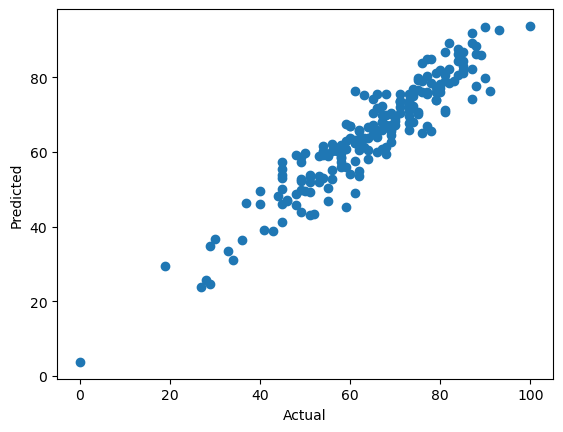

In [16]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual")
plt.ylabel('Predicted')
plt.show()

<Axes: xlabel='math score'>

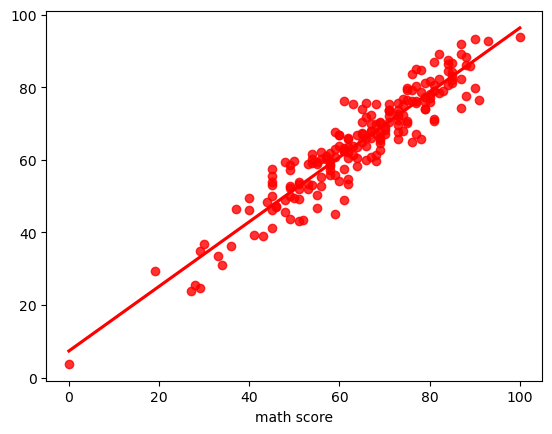

In [17]:
sns.regplot(x=y_test, y=y_pred, ci=None, color='red')

## Difference between Actual and Predicted Values

In [18]:
pred_df = pd.DataFrame({'Actual Value': y_test , 'Predicted Value' : y_pred, 'Difference' : y_test - y_pred})
pred_df

Actual Value  Predicted Value  Difference
521            91        76.387970   14.612030
737            53        58.885970   -5.885970
740            80        76.990265    3.009735
660            74        76.851804   -2.851804
411            84        87.627378   -3.627378
..            ...              ...         ...
408            52        43.409149    8.590851
332            62        62.152214   -0.152214
208            74        67.888395    6.111605
613            65        67.022287   -2.022287
78             61        62.345132   -1.345132

[200 rows x 3 columns]